### Initial Imports

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, gamma, lognorm, weibull_min
import seaborn as sns

## Question 3

In [53]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


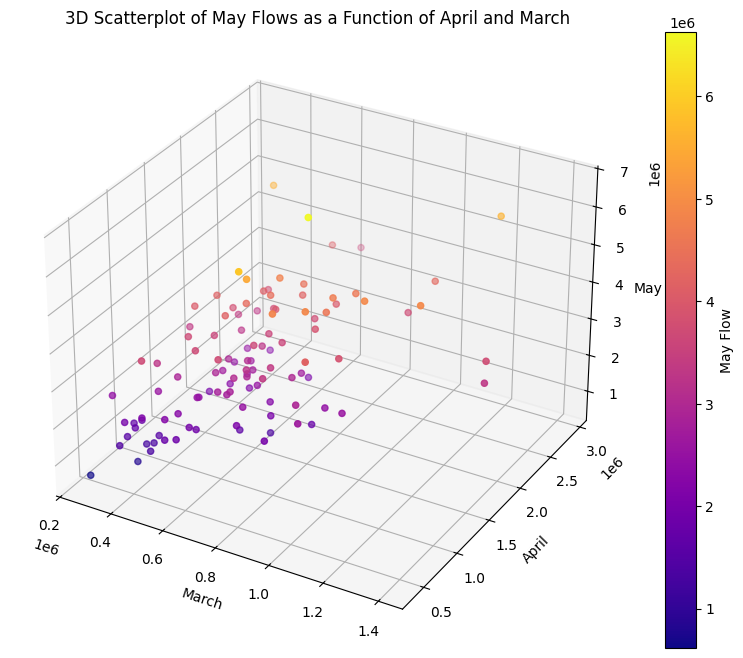

In [54]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(lee_ferry['Mar'], lee_ferry['Apr'], lee_ferry['May'], 
                     c=lee_ferry['May'], cmap='plasma')
fig.colorbar(scatter, label='May Flow')

ax.set_xlabel('March')
ax.set_ylabel('April')
ax.set_zlabel('May')

plt.title('3D Scatterplot of May Flows as a Function of April and March')
plt.show()

## Question 4

# May

In [122]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

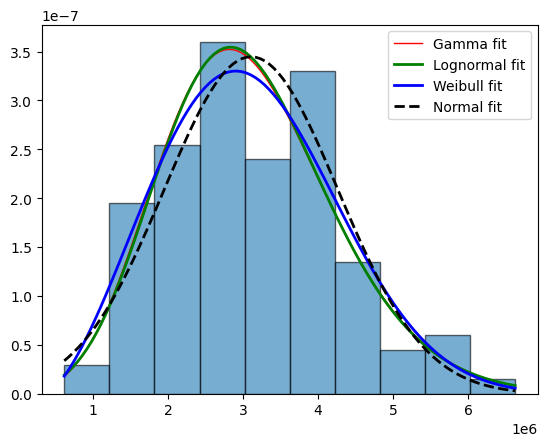

In [123]:
#May
# may = np.array(lee_ferry['May'])
# may_pandas = pd.DataFrame(lee_ferry['May'])


#normal
mean_n, std_n = norm.fit(may)
#gamma
g_fit = gamma.fit(may)
#lognormal
ln_fit = lognorm.fit(may)
#weibull
wb_fit = weibull_min.fit(may)


x = np.linspace(min(may), max(may), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

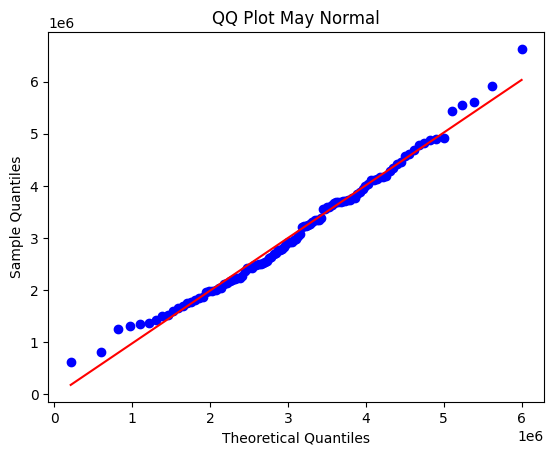

In [124]:
stats.probplot(may, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot May Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

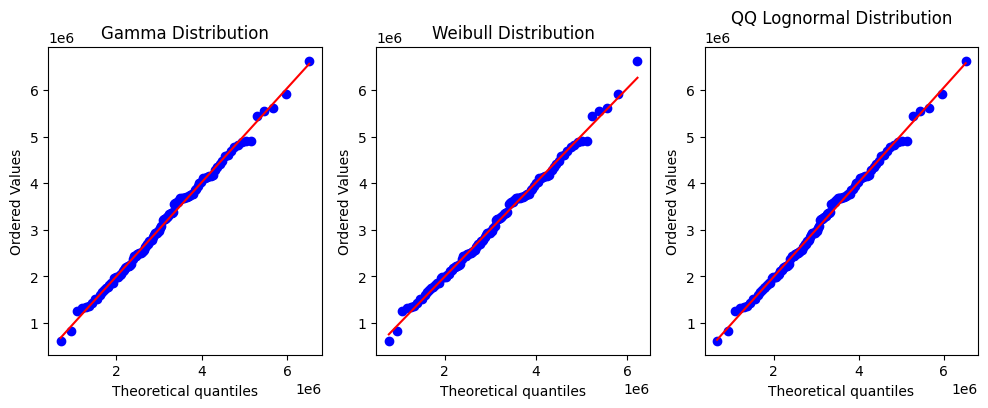

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(may, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(may, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(may, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [ ]:
statistic, p_value = stats.kstest(may, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(may, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(may, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(may, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

K-S Statistic: 0.06007286857476535
P-value: 0.7952783900571776
Fail to reject the null hypothesis: The sample follows the fitted normal distribution.
Gamma K-S Statistic: 0.06541986067118755
Gamma P-value: 0.7040221058892591
Weibull K-S Statistic: 0.051319455258425295
Weibull P-value: 0.9172135633668114
Lognormal K-S Statistic: 0.06566011914631265
Lognormal P-value: 0.6997838322905194


## Aug

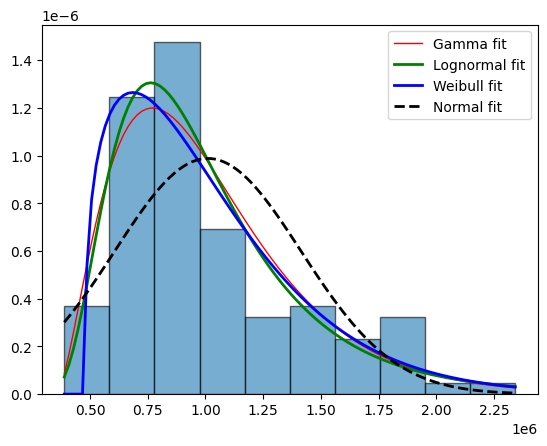

In [129]:
##Aug
Aug = np.array(lee_ferry['Aug'])
#normal
mean_n, std_n = norm.fit(Aug)
#gamma
g_fit = gamma.fit(Aug)
#lognormal
ln_fit = lognorm.fit(Aug)
#weibull
wb_fit = weibull_min.fit(Aug)

x = np.linspace(min(Aug), max(Aug), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Aug, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

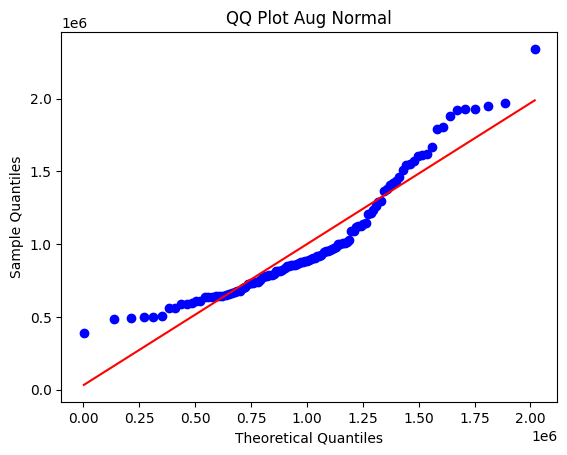

In [130]:
stats.probplot(Aug, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

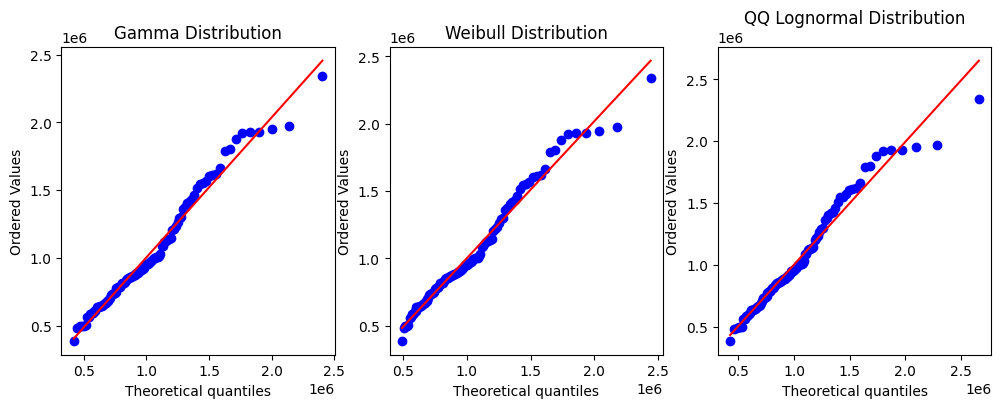

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Aug, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Aug, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Aug, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [ ]:
statistic, p_value = stats.kstest(Aug, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Aug, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Aug, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Aug, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

K-S Statistic: 0.1623153538906797
P-value: 0.005054026864407601
Gamma K-S Statistic: 0.08203681345518143
Gamma P-value: 0.4213310485865376
Weibull K-S Statistic: 0.07332568706302134
Weibull P-value: 0.5641620179826017
Lognormal K-S Statistic: 0.0634161265536094
Lognormal P-value: 0.7390286494767206


## Dec

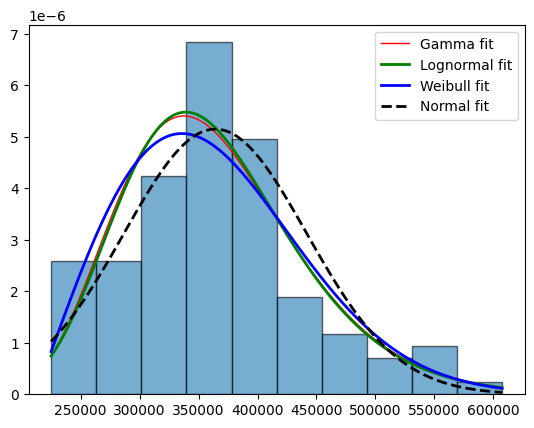

In [133]:
#Dec
Dec = np.array(lee_ferry['Dec'])
#normal
mean_n, std_n = norm.fit(Dec)
#gamma
g_fit = gamma.fit(Dec)
#lognormal
ln_fit = lognorm.fit(Dec)
#weibull
wb_fit = weibull_min.fit(Dec)

x = np.linspace(min(Dec), max(Dec), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Dec, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

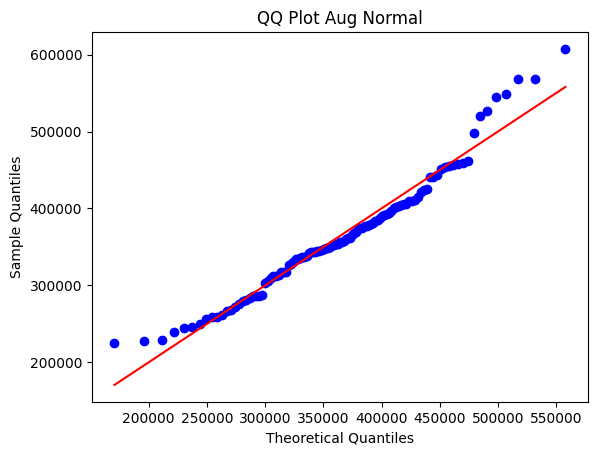

In [134]:
stats.probplot(Dec, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

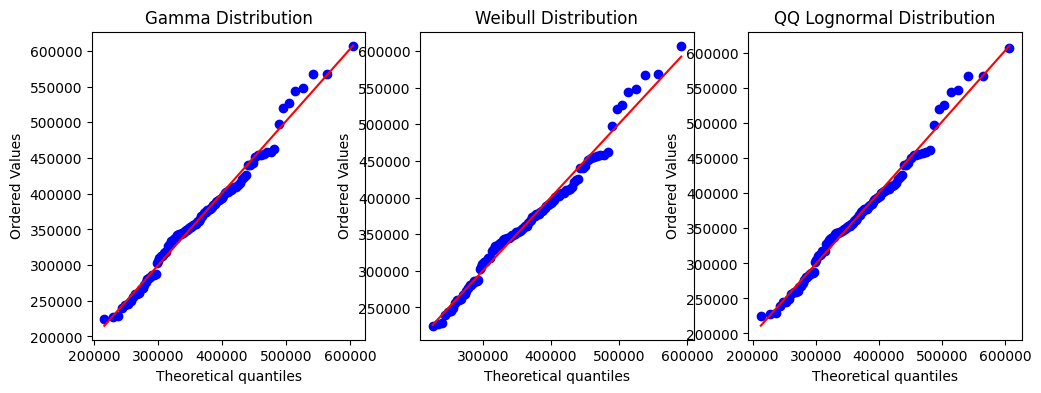

In [135]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Dec, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Dec, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Dec, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [137]:
statistic, p_value = stats.kstest(Dec, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print("Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Dec, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Dec, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Dec, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.07232808930305501
Normal P-value: {p_value}
Gamma K-S Statistic: 0.07770585501742899
Gamma P-value: 0.4899348747353567
Weibull K-S Statistic: 0.08447837182427537
Weibull P-value: 0.3851882800457106
Lognormal K-S Statistic: 0.07441616172683801
Lognormal P-value: 0.5453134485209119
